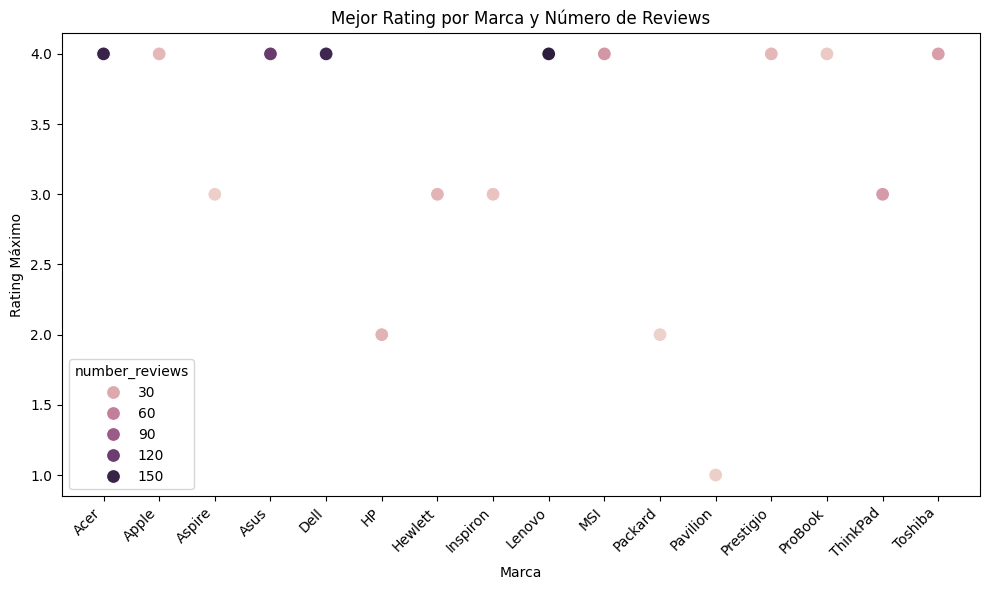

In [2]:
import pandas as pd # Importamos la librería pandas para la manipulación de la data.
import matplotlib.pyplot as plt # Importamos la libreria matplotlib para visualizacion de datos.
import seaborn as sns # Importamos la libreria seaborn para la visualizacion de datos.
import os # Importamos os para el manejo del sistema de archivos

#Crear directorio para almacenar la imagen generada
os.makedirs("../assets/", exist_ok=True)

#Cargamos los datos procesados.
data_path = "../data/processed/clean_products.csv"
df = pd.read_csv(data_path)

# Análisis y visualización
df['brand'] = df['brand'].apply(lambda x: x.split()[0]) #Tomar la primera palabra de cada marca
best_rating_reviews = df.groupby('brand').agg({'rating': 'max', 'number_reviews': 'sum'}).reset_index() # Agregamos el rating máximo y el número total de reseñas por marca, luego restablecemos el índice.
temp_df = pd.DataFrame({'brand': best_rating_reviews['brand'],
                        'rating': best_rating_reviews['rating'],
                        'number_reviews': best_rating_reviews['number_reviews']}) # Creamos un DataFrame temporal para facilitar la visualización.
plt.figure(figsize=(10, 6)) # Configuramos el tamaño de la figura.
sns.scatterplot(data=temp_df, x='brand', y='rating', hue='number_reviews', s=100) # Creamos un gráfico de dispersión con seaborn.
plt.title('Mejor Rating por Marca y Número de Reviews') # Título del gráfico.
plt.xlabel('Marca')  # Etiqueta del eje x.
plt.ylabel('Rating Máximo')  # Etiqueta del eje y.
plt.xticks(rotation=45, ha='right')  # Rotamos las etiquetas del eje x para mayor legibilidad.
plt.tight_layout() # Ajustamos el diseño de la figura.
plt.savefig(os.path.join("../assets/", 'rating_por_marca.png'))  # Guardamos la figura en el directorio "assets".
plt.show()  # Mostramos la gráfica.